# Imports

In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [2]:
# Training data
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
app_test.shape

(48744, 121)

In [5]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_ANNUITY, DAYS_BIRTH, DAYS_EMPLOYED etc. seem to have outliers owing to large difference between quartiles and min max values. These will be explored later.

Additionally, note that days column has negative values.

In [7]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Examine the Distribution of the Target Column

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

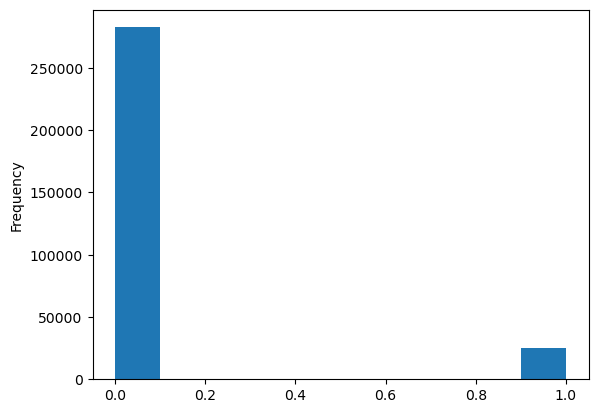

In [9]:
app_train['TARGET'].plot.hist();

We see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid.

### Examine Missing Values

Since there are over 100 features, we will define a function to look at null values.

In [10]:
def mis_val(df):
    m_val=df.isnull().sum()
    m_val_per=(m_val/len(df))*100
    m_val_table=pd.concat([m_val,m_val_per],axis=1)
    m_val_table_sorted=m_val_table.sort_values(by=1,ascending=False)
    m_val_table_sorted.rename(columns={0:'Missing_Value',1:'Missing_Value_Percent'},inplace=True)
    m_val_table_sorted=pd.DataFrame(m_val_table_sorted)
    
    k=len(m_val_table_sorted[m_val_table_sorted.Missing_Value !=0])
    m=len(m_val_table_sorted)
    
    print('Total Column with missing values is '+ str(k))
    print('Total Columns in dataframe is ' + str(m))
    return(m_val_table_sorted)   

In [11]:
mis_val(app_train).head(30)

Total Column with missing values is 67
Total Columns in dataframe is 122


,Missing_Value,Missing_Value_Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


### Column Types

In [12]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
app_train.TARGET.unique().size

2

In [14]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [15]:
df_ob=app_train.select_dtypes('object')

In [16]:
iter=df_ob.columns

In [17]:
# Number of unique classes in each object column of train
for i in iter:
    print(i, df_ob[i].unique().size)

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 8
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 19
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 5
HOUSETYPE_MODE 4
WALLSMATERIAL_MODE 8
EMERGENCYSTATE_MODE 3


In [18]:
df_ob_test=app_test.select_dtypes('object')

In [19]:
iter1=df_ob_test.columns

In [20]:
# Number of unique classes in each object column of test
for i in iter:
    print(i, df_ob_test[i].unique().size)

NAME_CONTRACT_TYPE 2
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 8
NAME_INCOME_TYPE 7
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 19
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 5
HOUSETYPE_MODE 4
WALLSMATERIAL_MODE 8
EMERGENCYSTATE_MODE 3


In [21]:
app_train.EMERGENCYSTATE_MODE.unique()

array(['No', nan, 'Yes'], dtype=object)

In [22]:
app_train.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [23]:
app_train.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


### Encoding Categorical Variables

#### Using label encoder for features with up to 2 categories

In [24]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


#### Using one hot encoding for other categorical variables

In [25]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


Using ohe has exploded the number of features.

### Aligning Training and Testing Data

Since train and test features have different dimensions, we need to align them. This has happened because some categories might be absent in test dataframe.

In [26]:
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Back to Exploratory Data Analysis

We note that date column has negative values. It is due to the fact that days are measured relative to current date.

In [27]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

The days birth column seemingly does not has outliers.

- Lets now look at days employed column

In [28]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [29]:
(app_train['DAYS_EMPLOYED']/ -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

The min reading here is 1000 years and is clearly incorrect. Lets explore these incorrect readings.

In [30]:
app_train[app_train['DAYS_EMPLOYED']/ -365 >50]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET


In [31]:
app_train[app_train['DAYS_EMPLOYED']/ -365 <0].DAYS_EMPLOYED

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [32]:
app_train[app_train['DAYS_EMPLOYED']/ -365 <0].DAYS_EMPLOYED.unique()

array([365243], dtype=int64)

It seems that all outliers in days employed column have the above value.

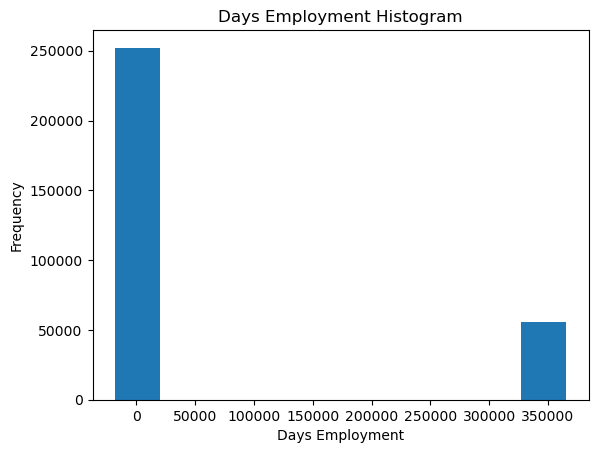

In [33]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

- To deal with the anomalies, we will set them as a nan and impute them later. A column will be created to note if the nan value was earlier an outlier.

In [34]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED_ANOM'].head()

0    False
1    False
2    False
3    False
4    False
Name: DAYS_EMPLOYED_ANOM, dtype: bool

In [35]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

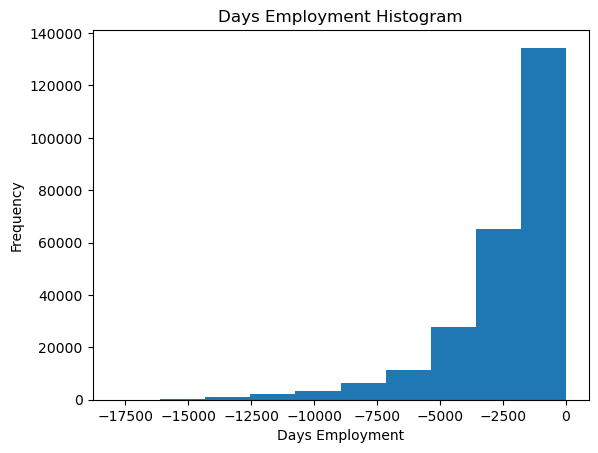

In [36]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

We need to repeat the above porcess for test data

In [37]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

#### Correlations

- Corr with target

In [38]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

All features are weakly correlated with the target. We might drop a few of them or use PCA for dimensionality reuction in further iteration.

- However, lets look at the relevant max positively corr feature.

In [39]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

- It seems as people age, they are less likely to default. Lets explore this feature.

### Univariate distribution

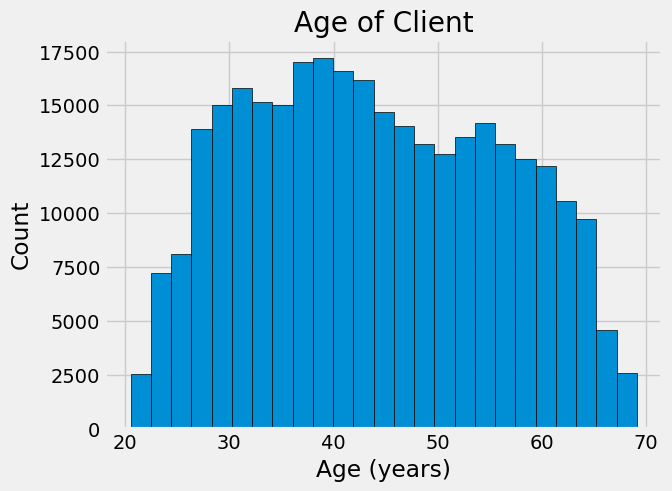

In [40]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

### Using kde's for bivariate analysis

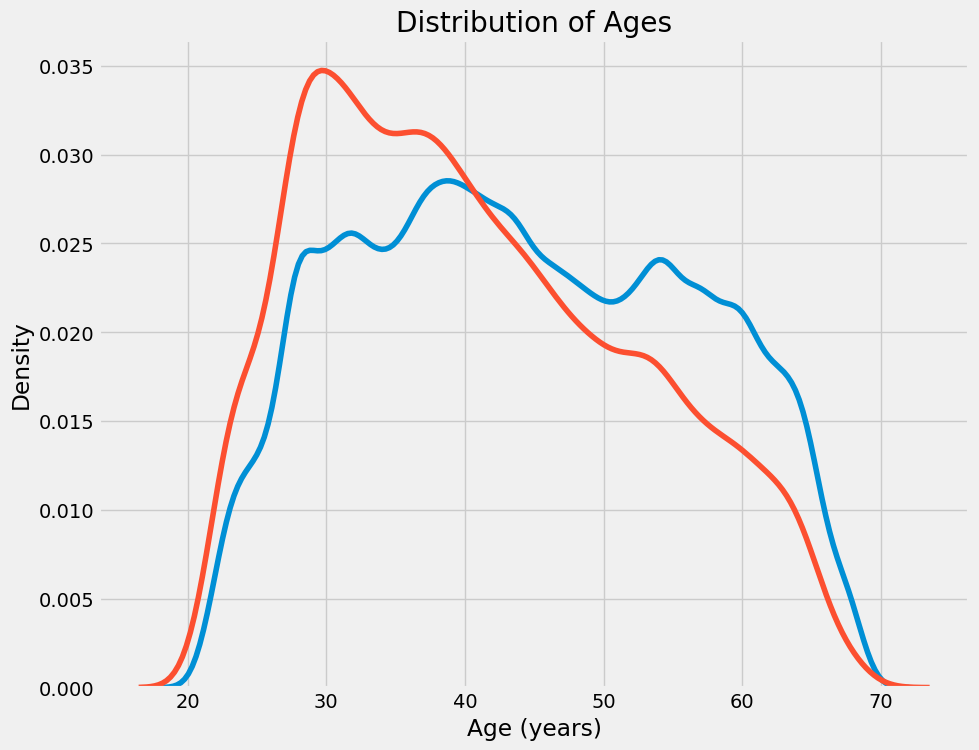

In [41]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

- Lets bin years together to further see effect of age on target.

In [42]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [43]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219


In [44]:
# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(5)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [45]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


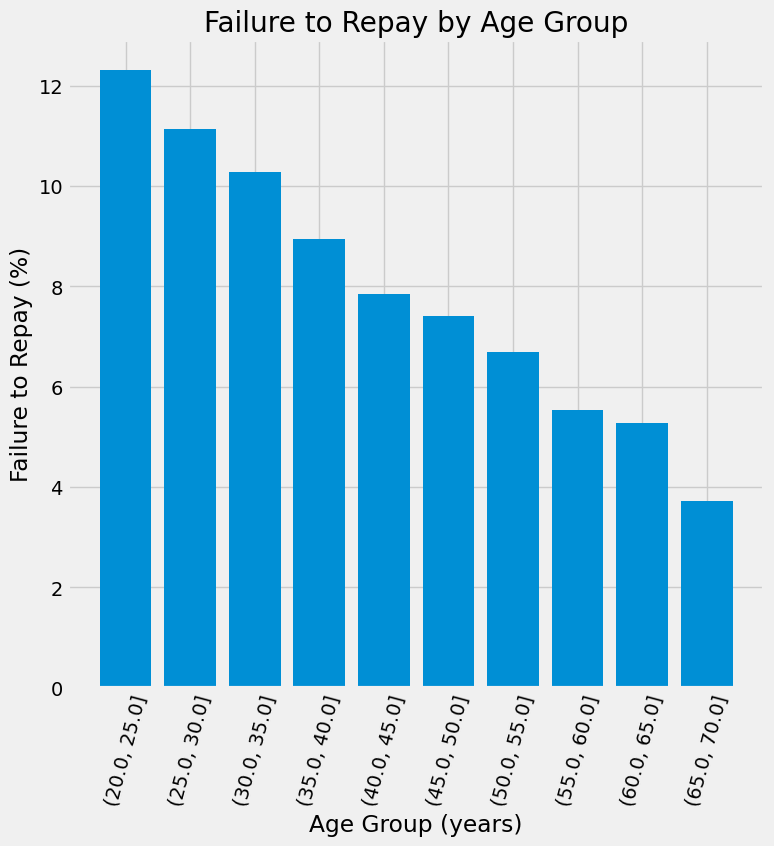

In [46]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

- This confirms the clear trend that younger applicants are more prone to default on their loans.

### Now lets explore the high negative corr features, ie, the EXT_Sources

#### Bivariate analysis with features

In [47]:

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


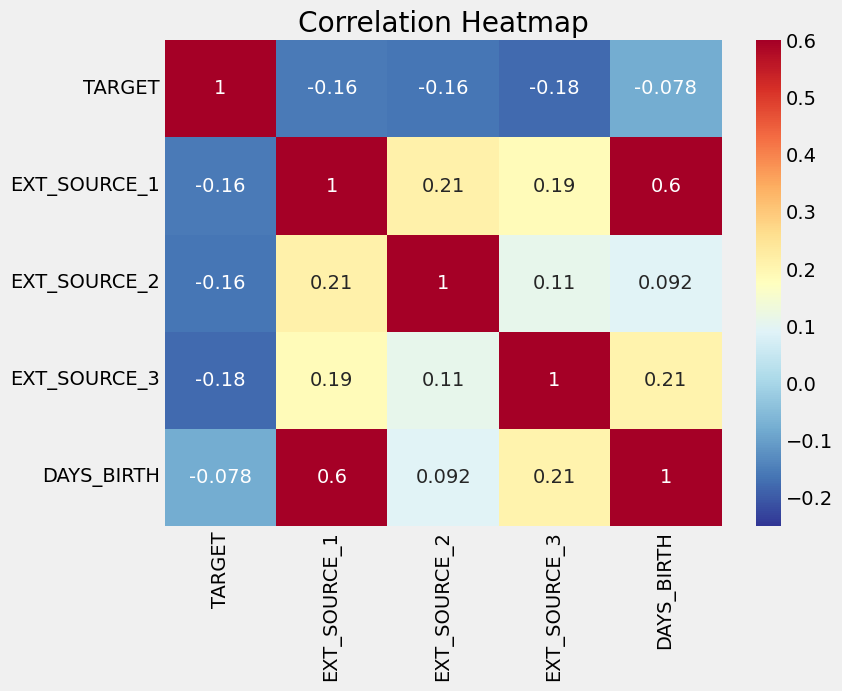

In [48]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

- The three ext_sources share negative correlation with target.

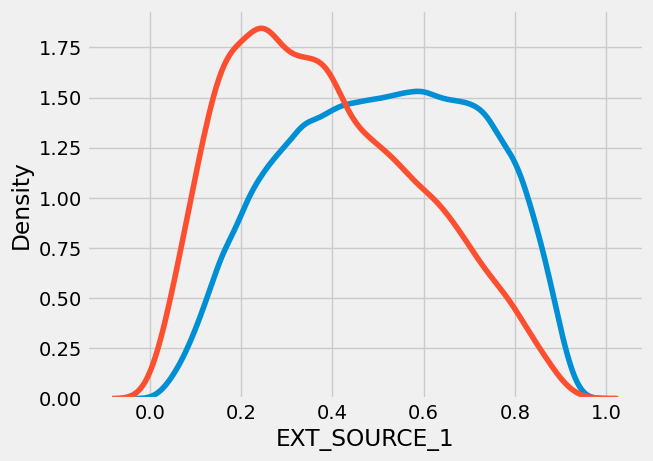

In [49]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_1' ], label = 'target == 0');
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_1' ], label = 'target == 1');

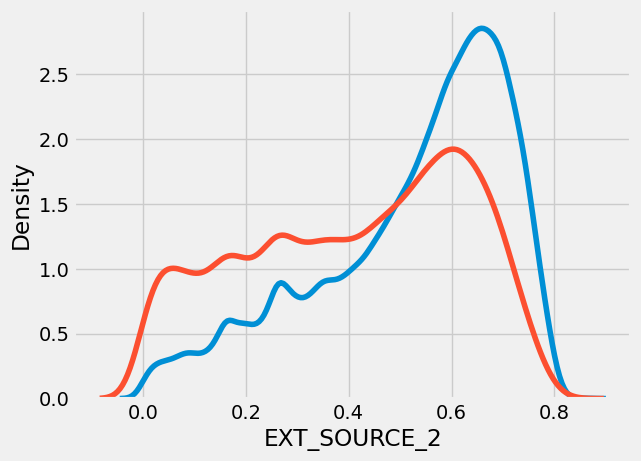

In [50]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_2' ], label = 'target == 0');
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_2' ], label = 'target == 1');

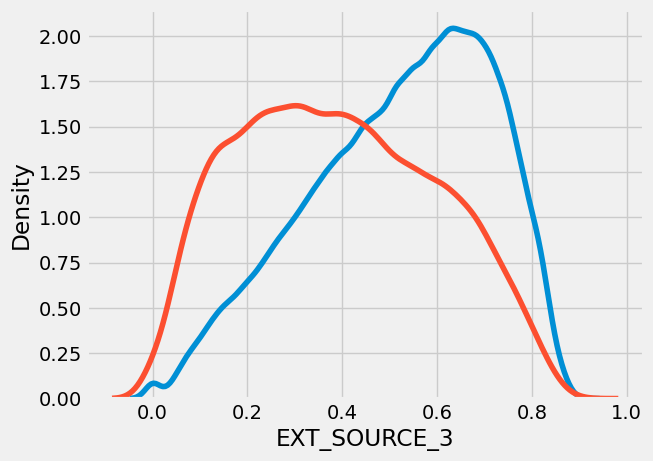

In [51]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_3' ], label = 'target == 0');
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_3' ], label = 'target == 1');

- Ext Source 3 shows the highest differentiability in ability to repay loans.

### Pair Plots

In [52]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
plot_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,0.083037,0.262949,0.139376
1,0,0.311267,0.622246,NaN
2,0,NaN,0.555912,0.729567
3,0,NaN,0.650442,NaN
4,0,NaN,0.322738,NaN


In [53]:
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
1,0,0.311267,0.622246,NaN,45.931507
2,0,NaN,0.555912,0.729567,52.180822
3,0,NaN,0.650442,NaN,52.068493
4,0,NaN,0.322738,NaN,54.608219


In [54]:
# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]
plot_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
6,0,0.774761,0.724000,0.492060,37.747945
8,0,0.587334,0.205747,0.751724,55.065753
10,0,0.319760,0.651862,0.363945,27.936986
11,0,0.722044,0.555183,0.652897,55.936986


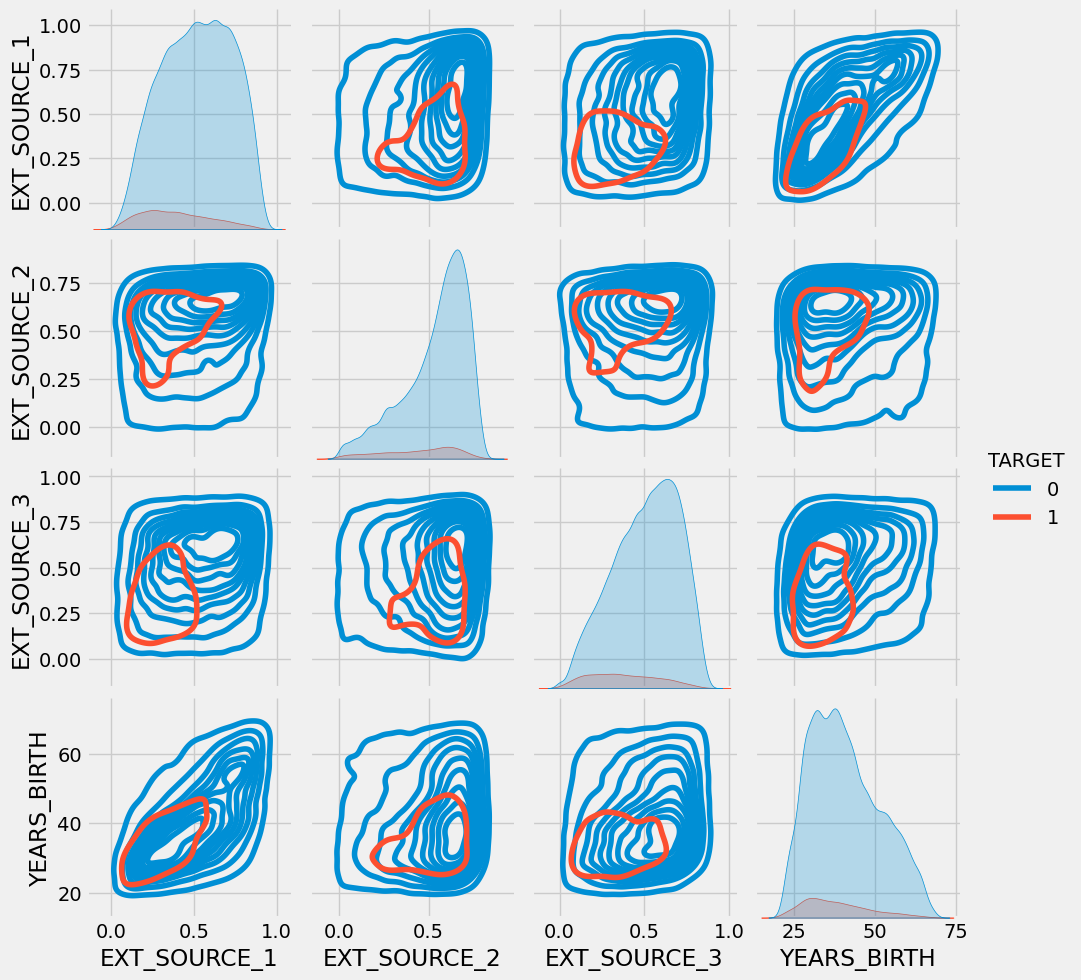

In [293]:
sns.pairplot(plot_data,hue='TARGET',kind='kde',vars=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BIRTH']);

## Feature Engineering

#### Using polynomial features

In [55]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features.head(3)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.083037,0.262949,0.139376,9461,1
1,0.311267,0.622246,NaN,16765,0
2,NaN,0.555912,0.729567,19046,0


In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [57]:
poly_features

array([[8.30369674e-02, 2.62948593e-01, 1.39375780e-01, 9.46100000e+03],
       [3.11267311e-01, 6.22245775e-01, 5.35276250e-01, 1.67650000e+04],
       [5.05997931e-01, 5.55912083e-01, 7.29566691e-01, 1.90460000e+04],
       ...,
       [7.44026400e-01, 5.35721752e-01, 2.18859082e-01, 1.49660000e+04],
       [5.05997931e-01, 5.14162820e-01, 6.61023539e-01, 1.19610000e+04],
       [7.34459669e-01, 7.08568896e-01, 1.13922396e-01, 1.68560000e+04]])

In [58]:
from sklearn.preprocessing import PolynomialFeatures
                                  
poly_transformer = PolynomialFeatures(degree = 3)

In [59]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [60]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

- Checking for correlation between new polynomial features and target

In [61]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_features.head(3)

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0


In [62]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


We note that many of the new polynomial features have higher correlation with the target than the original features. These will be stored in a copy for now and later used for our model.

In [63]:
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features_test.head()

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,1.0,0.752614,0.789654,0.159520,-19241.0,0.566429,0.594305,0.120057,-14481.055414,0.623554,...,0.492392,0.099469,-11997.802403,0.020094,-2423.698322,2.923427e+08,0.004059,-489.615795,5.905670e+07,-7.123328e+12
1,1.0,0.564990,0.291656,0.432962,-18064.0,0.319214,0.164783,0.244619,-10205.983005,0.085063,...,0.024809,0.036829,-1536.577117,0.054673,-2281.043619,9.516956e+07,0.081161,-3386.201665,1.412789e+08,-5.894429e+12
2,1.0,0.505998,0.699787,0.610991,-20038.0,0.256034,0.354091,0.309160,-10139.186531,0.489702,...,0.342687,0.299203,-9812.640816,0.261238,-8567.521115,2.809794e+08,0.228089,-7480.393855,2.453261e+08,-8.045687e+12
3,1.0,0.525734,0.509677,0.612704,-13976.0,0.276396,0.267955,0.322119,-7347.658072,0.259771,...,0.132399,0.159163,-3630.555667,0.191336,-4364.443591,9.955450e+07,0.230013,-5246.681115,1.196786e+08,-2.729912e+12
4,1.0,0.202145,0.425687,0.535276,-13040.0,0.040863,0.086051,0.108203,-2635.970697,0.181210,...,0.077139,0.096997,-2362.974127,0.121968,-2971.298294,7.238455e+07,0.153368,-3736.229463,9.101923e+07,-2.217342e+12


In [64]:
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [65]:
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

In [66]:
app_train_poly.shape

(307511, 277)

In [67]:
app_test_poly.shape

(48744, 275)

In [68]:
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)


print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## Domain Knowledge Features

These features are engineered as per financial understanding to see if they affect our learning algo:

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income

CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due

DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [69]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [70]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Visualizing new variables

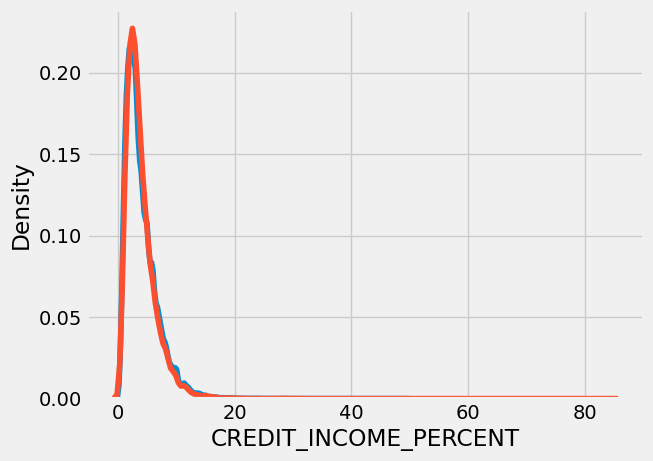

In [71]:
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, 'CREDIT_INCOME_PERCENT' ], label = 'target == 0');
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, 'CREDIT_INCOME_PERCENT' ], label = 'target == 1');

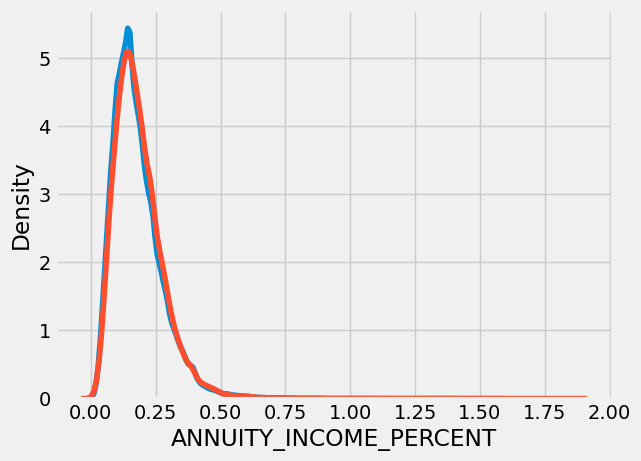

In [72]:
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, 'ANNUITY_INCOME_PERCENT' ], label = 'target == 0');
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, 'ANNUITY_INCOME_PERCENT' ], label = 'target == 1');

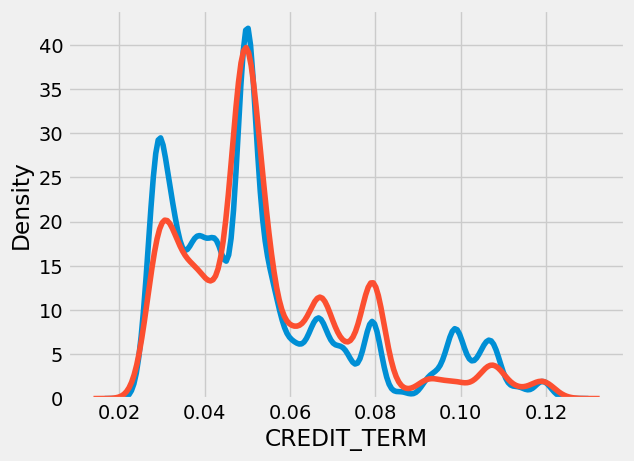

In [73]:
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, 'CREDIT_TERM' ], label = 'target == 0');
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, 'CREDIT_TERM' ], label = 'target == 1');

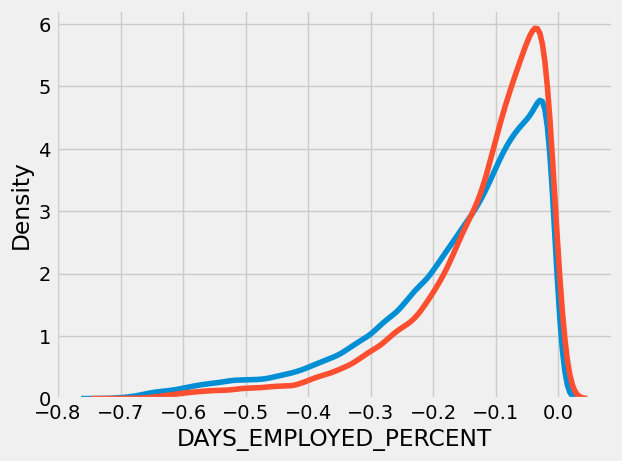

In [74]:
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, 'DAYS_EMPLOYED_PERCENT' ], label = 'target == 0');
sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, 'DAYS_EMPLOYED_PERCENT' ], label = 'target == 1');

### Lets see their correlation with target

In [75]:
app_train_domain['CREDIT_INCOME_PERCENT'].corr(app_train_domain['TARGET'])

-0.007726797322294069

In [76]:
app_train_domain['ANNUITY_INCOME_PERCENT'].corr(app_train_domain['TARGET'])

0.01426522069805464

In [77]:
app_train_domain['CREDIT_TERM'].corr(app_train_domain['TARGET'])

0.01270361095150066

In [78]:
app_train_domain['DAYS_EMPLOYED_PERCENT'].corr(app_train_domain['TARGET'])

0.06795454075818777

In [79]:
correlations1 = app_train_domain.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations1.tail(15))
print('\nMost Negative Correlations:\n', correlations1.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED_PERCENT                                0.067955
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

- It seems that the domain knowledge features are not appreciably correlated with target

# Model Building

First we will impute missing values and normalize the features(feature scaling)

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [81]:
type(train)

numpy.ndarray

In [82]:
train=pd.DataFrame(train,columns = features)

In [83]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [84]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.000000,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000003,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000006,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [86]:
train_labels

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [87]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [88]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [89]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

### Trying Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [91]:
# Train on the training data
random_forest.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.8s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [99]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [115]:
top15_features=feature_importances.sort_values(by=['importance'],ascending=False).head(15)

In [116]:
top15_features

,feature,importance
32,EXT_SOURCE_2,0.049347
33,EXT_SOURCE_3,0.046798
13,DAYS_ID_PUBLISH,0.031880
10,DAYS_BIRTH,0.031843
12,DAYS_REGISTRATION,0.031321
0,SK_ID_CURR,0.030372
11,DAYS_EMPLOYED,0.029347
7,AMT_ANNUITY,0.029127
81,DAYS_LAST_PHONE_CHANGE,0.027918
6,AMT_CREDIT,0.027431


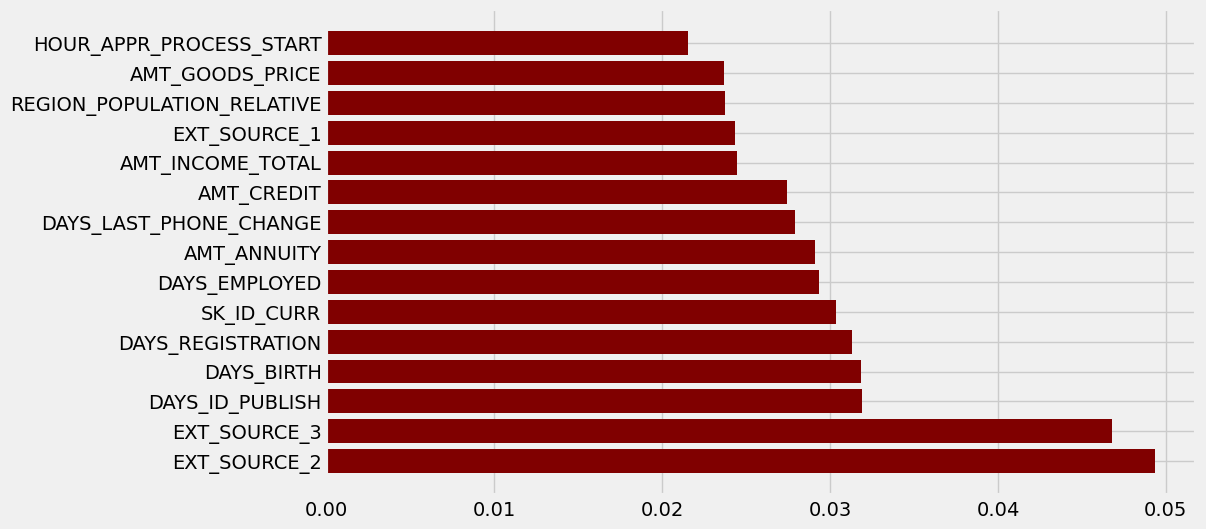

In [134]:
# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

Make Predictions using Engineered Features

In [135]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [136]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

### Predictions using domain features

In [143]:
domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [144]:
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.9s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [145]:
# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

In [149]:
top15_features_domain=feature_importances_domain.sort_values(by=['importance'],ascending=False).head(15)

In [146]:
# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

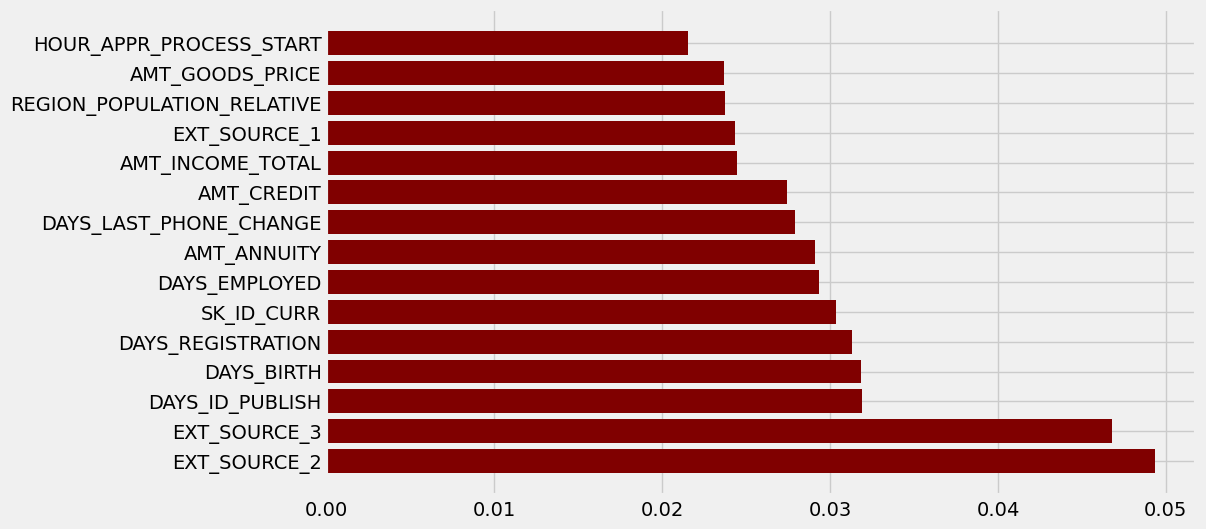

In [148]:
plt.figure(figsize = (10, 6))
plt.barh(top15_features.feature, top15_features.importance, color ='maroon');

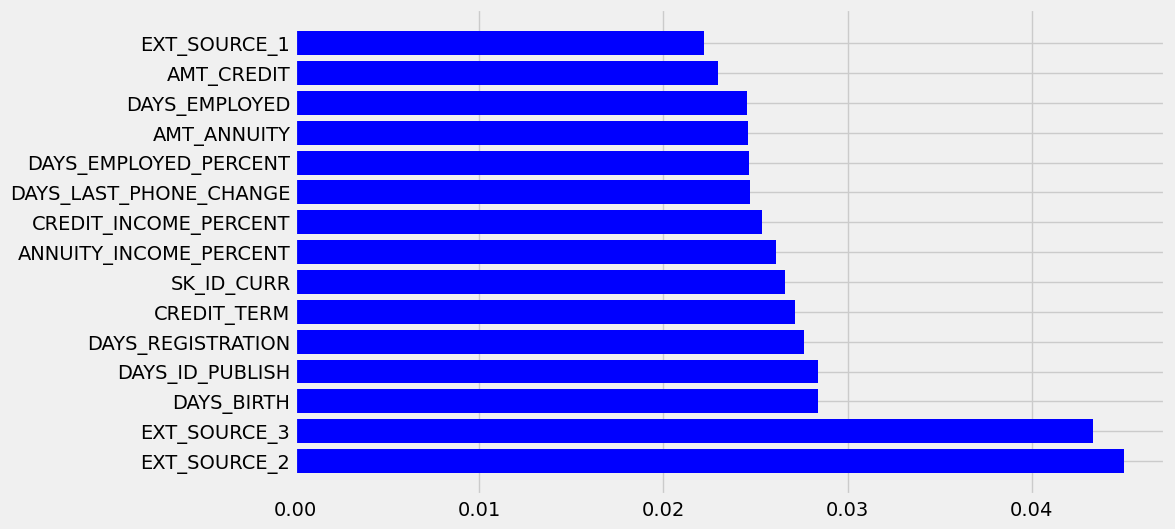

In [150]:
plt.figure(figsize = (10, 6))
plt.barh(top15_features_domain.feature, top15_features_domain.importance, color ='blue');

We see that all four of our hand-engineered features made it into the top 15 most important.

# Trying Lightgbm

In [260]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [261]:
app_train1=app_train.copy()
app_test1=app_test.copy()

In [262]:
 # Extract the ids
train_ids = app_train1['SK_ID_CURR']
test_ids = app_test1['SK_ID_CURR']

In [263]:
# Extract the labels for training
labels = app_train1['TARGET']

In [264]:
# Remove the ids and target
features = app_train1.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_features = app_test1.drop(columns = ['SK_ID_CURR'])

In [265]:
print('Training Data Shape: ', features.shape)
print('Testing Data Shape: ', test_features.shape)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)


In [266]:
# Extract feature names
feature_names = list(features.columns)

In [267]:
# Convert to np arrays
features = np.array(features)
test_features = np.array(test_features)

In [268]:
# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

In [269]:
k_fold

KFold(n_splits=5, random_state=50, shuffle=True)

In [270]:
# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

In [271]:
# Empty array for test predictions
test_predictions = np.zeros(test_features.shape[0])

In [272]:
# Empty array for out of fold validation predictions
out_of_fold = np.zeros(features.shape[0])

In [273]:
# Lists for recording validation and training scores
valid_scores = []
train_scores = []

In [226]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [225]:
features

array([[0, 0, 1, ..., 1, 0, False],
       [0, 0, 0, ..., 1, 0, False],
       [1, 1, 1, ..., 0, 0, False],
       ...,
       [0, 0, 1, ..., 1, 0, False],
       [0, 0, 1, ..., 1, 0, False],
       [0, 0, 0, ..., 1, 0, False]], dtype=object)

In [239]:
# Just trying out kfold splits and its internal workings

In [230]:
#k1=KFold(n_splits=3)
#k1

KFold(n_splits=3, random_state=None, shuffle=False)

In [235]:
#k1.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

<generator object _BaseKFold.split at 0x000002A03770BDD0>

In [242]:
#for tr,te in k1.split([77,2,3,4,5,6,7,8,9,10,11,12,13,14,15]):
    print(tr,te)

[ 5  6  7  8  9 10 11 12 13 14] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14] [5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14]


In [240]:
#Trial end for k fold

In [274]:
 # Iterate through each fold
for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], 
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
[200]	train's auc: 0.797648	train's binary_logloss: 0.549331	valid's auc: 0.763246	valid's binary_logloss: 0.564236
[200]	train's auc: 0.798855	train's binary_logloss: 0.547952	valid's auc: 0.757131	valid's binary_logloss: 0.562234
[200]	train's auc: 0.797918	train's binary_logloss: 0.548584	valid's auc: 0.758065	valid's binary_logloss: 0.564721


In [275]:
# Make the submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    

In [276]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})    

In [277]:
# Overall validation score
valid_auc = roc_auc_score(labels, out_of_fold)

In [278]:
# Add the overall scores to the metrics
valid_scores.append(valid_auc)
train_scores.append(np.mean(train_scores))

In [279]:
# Needed for creating dataframe of validation scores
fold_names = list(range(5))
fold_names.append('overall')

In [280]:
fold_names

[0, 1, 2, 3, 4, 'overall']

In [281]:
train_scores

[0.8166574043241737,
 0.8169000328222366,
 0.8081110350569859,
 0.8118870085490106,
 0.811616930131392,
 0.8130344821767599]

In [282]:
valid_scores

[0.7552153894636197,
 0.7587543220231809,
 0.763629600843101,
 0.7575833874479784,
 0.7583443472346113,
 0.7587048554415765]

In [283]:
# Dataframe of validation scores
metrics = pd.DataFrame({'fold': fold_names, 'train': train_scores,'valid': valid_scores}) 

In [284]:
print(metrics)

      fold     train     valid
0        0  0.816657  0.755215
1        1  0.816900  0.758754
2        2  0.808111  0.763630
3        3  0.811887  0.757583
4        4  0.811617  0.758344
5  overall  0.813034  0.758705


In [290]:
# Plotting feature importance for lightgbm

In [286]:
feature_importances

,feature,importance
0,NAME_CONTRACT_TYPE,66.4
1,FLAG_OWN_CAR,7.2
2,FLAG_OWN_REALTY,13.8
3,CNT_CHILDREN,13.8
4,AMT_INCOME_TOTAL,170.6
...,...,...
234,"WALLSMATERIAL_MODE_Stone, brick",12.6
235,WALLSMATERIAL_MODE_Wooden,1.6
236,EMERGENCYSTATE_MODE_No,1.0
237,EMERGENCYSTATE_MODE_Yes,0.6


In [287]:
top15_features_lightgbm=feature_importances.sort_values(by=['importance'],ascending=False).head(15)

In [288]:
top15_features_lightgbm

,feature,importance
30,EXT_SOURCE_1,637.8
32,EXT_SOURCE_3,629.8
31,EXT_SOURCE_2,519.6
10,DAYS_EMPLOYED,434.6
9,DAYS_BIRTH,424.4
5,AMT_CREDIT,422.2
6,AMT_ANNUITY,383.4
7,AMT_GOODS_PRICE,346.8
12,DAYS_ID_PUBLISH,297.6
80,DAYS_LAST_PHONE_CHANGE,275.8


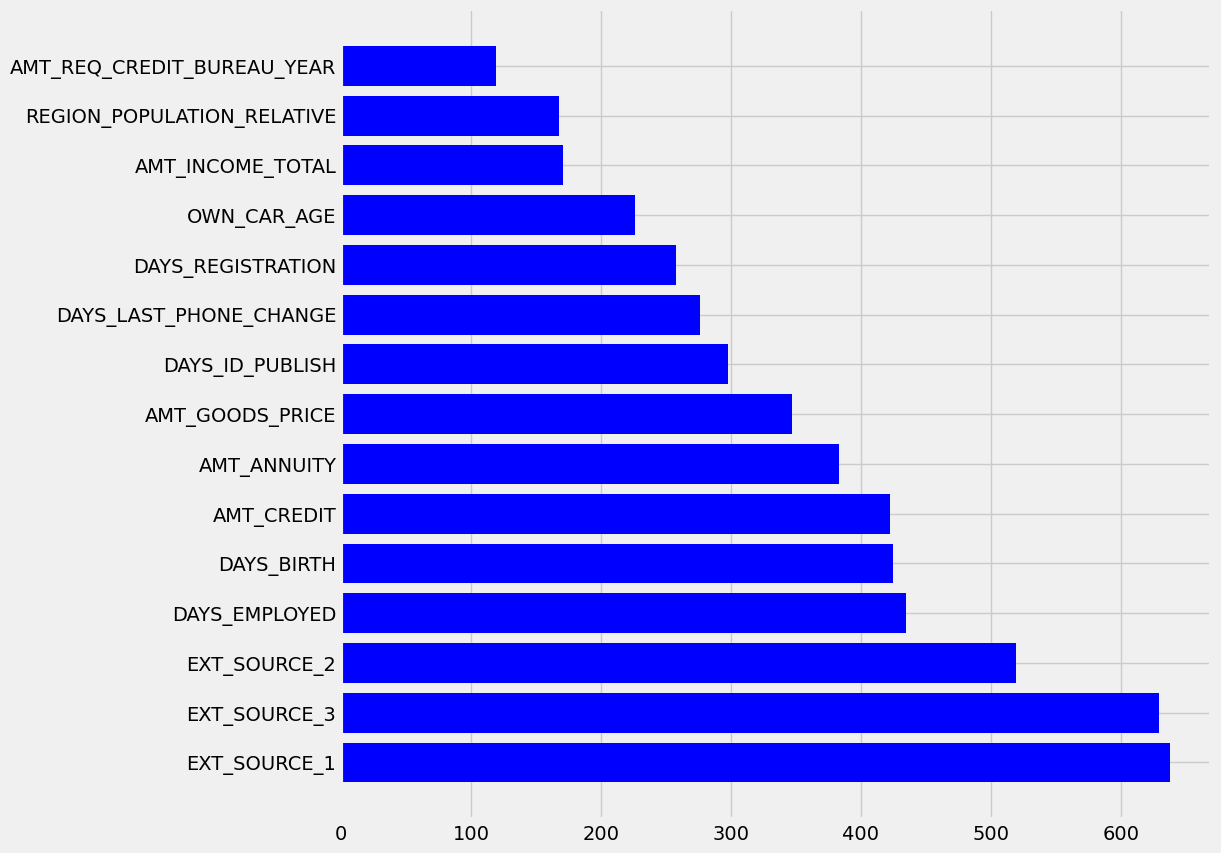

In [289]:
plt.figure(figsize = (10, 10))
plt.barh(top15_features_lightgbm.feature, top15_features_lightgbm.importance, color ='blue');

In [292]:
print(metrics)

      fold     train     valid
0        0  0.816657  0.755215
1        1  0.816900  0.758754
2        2  0.808111  0.763630
3        3  0.811887  0.757583
4        4  0.811617  0.758344
5  overall  0.813034  0.758705
